# Apple Stock Price Prediction 
## Step 2 Data Wrangling


This step consists of multiple components including Data Collection, Data Organization, Data Definitions, and Data Cleaning.

2.   **Data Wrangling** 
  * Data Collection
      - Data loading
   * Data Organization
      -  File structure
  * Data Definition
      - Column names
      - Data types (numeric, categorical, timestamp, etc.)
      - Description of the columns
      - Count or percent per unique values or codes (including NA)
      - The range of values or codes  
  * Data Cleaning
      - NA or missing data
      - Duplicates
  * Apple stock data
      - Merge dataframe together
      - Save as a new csv file 

## Data Collection

In [2]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Load the data from the csv file
Load `csv` files consist of `dividend`,`earnings`,`stockprice` and `summary` data down loaded from **Kaggle** data [https://www.kaggle.com/tsaustin/us-historical-stock-prices-with-earnings-data?select=stocks_latest]

In [3]:
# load data
dividend_df = pd.read_csv('data/dividends_latest.csv')
earning_df = pd.read_csv('data/earnings_latest.csv')
stockprice_df = pd.read_csv('data/stock_prices_latest.csv')
summary_df=pd.read_csv('data/dataset_summary.csv')

<font color='teal'> Load the data into a pandas dataframe and print the first five rows of the dataframe(s).</font>

In [4]:
dividend_df.head(5)

,symbol,date,dividend
0,MSFT,2016-11-15,0.39
1,MSFT,2011-05-17,0.16
2,MSFT,2008-05-13,0.11
3,MSFT,2011-02-15,0.16
4,MSFT,2012-02-14,0.20


In [5]:
earning_df.head(5)

,symbol,date,qtr,eps_est,eps,release_time
0,A,2009-05-14,04/2009,NaN,NaN,post
1,A,2009-08-17,07/2009,NaN,NaN,post
2,A,2009-11-13,10/2009,NaN,NaN,pre
3,A,2010-02-12,01/2010,NaN,NaN,pre
4,A,2010-05-17,04/2010,NaN,NaN,post


In [6]:
stockprice_df.head(5)

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,2016-05-16,50.80,51.96,50.75,51.83,49.7013,20032017,1.0
1,MSFT,2002-01-16,68.85,69.84,67.85,67.87,22.5902,30977700,1.0
2,MSFT,2001-09-18,53.41,55.00,53.17,54.32,18.0802,41591300,1.0
3,MSFT,2007-10-26,36.01,36.03,34.56,35.03,27.2232,288121200,1.0
4,MSFT,2014-06-27,41.61,42.29,41.51,42.25,38.6773,74640000,1.0


In [7]:
summary_df.head(5)

,symbol,total_prices,stock_from_date,stock_to_date,total_earnings,earnings_from_date,earnings_to_date
0,A,5135,1999-11-18,2020-04-17,44,2009-05-14,2020-02-18
1,AA,870,2016-11-01,2020-04-17,14,2017-01-24,2020-04-22
2,AAAP,574,2015-11-11,2018-07-18,0,NaN,NaN
3,AABA,5486,1998-01-02,2020-03-10,14,2014-01-28,2017-04-18
4,AAC,1292,2014-10-02,2020-04-07,22,2014-11-05,2019-08-30


## Data Organization

### Create subfolders in your project directory

<font color='teal'> **Create a subfolder called `data`.**</font>

In [8]:
# os.makedirs('data/')....the folder has already been created

<font color='teal'> **Create a folder for the data visualizations called `figures`.**</font>

In [9]:
# os.makedirs('figures/')

<font color='teal'> **Create a folder for the models you save, called `models`.**</font>

In [10]:
# os.makedirs('models/')

<font color='teal'> **Print the contents of your project folder to confirm.**</font>

In [11]:
print(os.listdir())

['.ipynb_checkpoints', 'data', 'models', 'Stock-price-prediction-data-wrangling.ipynb', 'figures']


## Data Definition
This step involves reviewing column `names`, `data types`, and `null values`.

### Column Names 
<font color='teal'> **Print the columns names of the `dividend` dataframe**</font>

In [12]:
print(dividend_df.columns)

Index(['symbol', 'date', 'dividend'], dtype='object')


<font color='teal'> **Print the columns names of the `earning` dataframe**</font>

In [13]:
print(earning_df.columns)

Index(['symbol', 'date', 'qtr', 'eps_est', 'eps', 'release_time'], dtype='object')


<font color='teal'> **Print the columns names of the `stockprice` dataframe**</font>

In [14]:
print(stockprice_df.columns)

Index(['symbol', 'date', 'open', 'high', 'low', 'close', 'close_adjusted',
       'volume', 'split_coefficient'],
      dtype='object')


<font color='teal'> **Print the columns names of the `summary` dataframe**</font>

In [15]:
print(summary_df.columns)

Index(['symbol', 'total_prices', 'stock_from_date', 'stock_to_date',
       'total_earnings', 'earnings_from_date', 'earnings_to_date'],
      dtype='object')


### Data Types 
Review which columns are integer, float, categorical, or dates.

<font color='teal'> **Use the `info()` function, to print the variable names, datatypes and count of non-null values.**</font>

In [16]:
# dividend
print(dividend_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239099 entries, 0 to 239098
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   symbol    239099 non-null  object 
 1   date      239099 non-null  object 
 2   dividend  239099 non-null  float64
dtypes: float64(1), object(2)
memory usage: 5.5+ MB
None


In [17]:
# earning
print(earning_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150189 entries, 0 to 150188
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   symbol        150189 non-null  object 
 1   date          150189 non-null  object 
 2   qtr           149185 non-null  object 
 3   eps_est       92951 non-null   float64
 4   eps           117802 non-null  float64
 5   release_time  103256 non-null  object 
dtypes: float64(2), object(4)
memory usage: 6.9+ MB
None


In [18]:
# stockprice
print(stockprice_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22228563 entries, 0 to 22228562
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   symbol             object 
 1   date               object 
 2   open               float64
 3   high               float64
 4   low                float64
 5   close              float64
 6   close_adjusted     float64
 7   volume             int64  
 8   split_coefficient  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.5+ GB
None


In [19]:
# summary
print(summary_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7091 entries, 0 to 7090
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   symbol              7091 non-null   object
 1   total_prices        7091 non-null   int64 
 2   stock_from_date     7091 non-null   object
 3   stock_to_date       7091 non-null   object
 4   total_earnings      7091 non-null   int64 
 5   earnings_from_date  4905 non-null   object
 6   earnings_to_date    4905 non-null   object
dtypes: int64(2), object(5)
memory usage: 387.9+ KB
None


Description of columns for **`dividend`** dataframe


| Column | Description |
| :- | :- |
| symbol | symbol of a company under which it operates in stock market |
| date | dividend issue date for a share |
| dividend | proportion of dividend issued |

Description of columns for **`earning`** dataframe

| Column | Description |
| :- | :- |
| symbol | symbol of a company under which it operates in stock market |
| date | earning issue date |
| qtr | the month and quarter (Q1, Q2, Q3 and Q4) of the year the earning was declared  |
| eps_est | estimated eps (earning per share)  |
| eps | exact eps  |
| release_time | earning issue date before or after the declaration date  |

Description of columns for **`stockprice`** dataframe

| Column | Description |
| :- | :- |
| symbol | symbol of a company under which it operates in stock market |
| date |  trading day of the year |
| open | opening price in a day  |
| high | high price for a particular day  |
| low | low price in a day  |
| close | closing price for a day  |
| close_adjusted | amended price that truly reflects stocks value after any corporate actions |
| volume | total volume traded in a day |
| split_coefficient | the ratio by which a firms outstanding share increases following a stock split. Higher is the 'stock split' reduced the price would be  |

Description of columns for **`summary`** dataframe

| Column | Description |
| :- | :- |
| symbol | symbol of a company under which it operates in stock market |
| total_prices | price change of the company in the specified duration |
| stock_from_date | counting start date |
| stock_to_date | counting stop date |
| total_earnings | total earning of the company in the specified time |
| earnings_from_date | the date from when earning count started |
| earnings_to_date | the date from when earning count stopped |

### Count of unique values or codes

In [20]:
print((dividend_df.nunique()/(dividend_df.count())*100))

symbol      1.766632
date        2.335853
dividend    3.409885
dtype: float64


In [21]:
print((earning_df.nunique()/(earning_df.count())*100))

symbol          3.440332
date            1.932232
qtr             0.087810
eps_est         4.796075
eps             1.794537
release_time    0.001937
dtype: float64


In [22]:
# print((stockprice_df.nunique()/(stockprice_df.count())*100))

In [23]:
print(summary_df.count())

symbol                7091
total_prices          7091
stock_from_date       7091
stock_to_date         7091
total_earnings        7091
earnings_from_date    4905
earnings_to_date      4905
dtype: int64


<font color='teal'> **Review the numeric dataset's summary statistics.**</font>

In [24]:
# dividend
print(dividend_df.describe())

            dividend
count  239099.000000
mean        0.248625
std         2.300869
min         0.000100
25%         0.065000
50%         0.120000
75%         0.250000
max       625.000000


In [25]:
# earning
print(earning_df.describe())

            eps_est            eps
count  92951.000000  117802.000000
mean       0.219240       0.076487
std       14.096168      14.527425
min     -987.540000    -987.540000
25%        0.010000      -0.010000
50%        0.290000       0.240000
75%        0.650000       0.600000
max      987.540000     987.540000


In [26]:
# stockprice
print(stockprice_df.describe())

               open          high           low         close  close_adjusted  \
count  2.222856e+07  2.222856e+07  2.222856e+07  2.222856e+07    2.222856e+07   
mean   6.474576e+01  6.534652e+01  6.410351e+01  1.311173e+02    2.789299e+04   
std    2.566883e+03  2.582539e+03  2.549334e+03  2.198358e+05    3.106711e+06   
min   -2.000000e-02 -2.000000e-02 -2.000000e-02 -2.000000e-02   -1.990000e-02   
25%    7.880000e+00  8.000000e+00  7.720000e+00  7.880000e+00    6.430000e+00   
50%    1.730000e+01  1.754000e+01  1.704000e+01  1.730000e+01    1.388170e+01   
75%    3.365000e+01  3.408890e+01  3.317500e+01  3.365000e+01    2.838640e+01   
max    3.450000e+05  3.474000e+05  3.445500e+05  9.077000e+08    1.069826e+09   

             volume  split_coefficient  
count  2.222856e+07       2.222856e+07  
mean   9.984234e+05       1.000068e+00  
std    6.667185e+06       3.650061e-02  
min    0.000000e+00       1.000000e-04  
25%    1.910000e+04       1.000000e+00  
50%    1.178670e+05     

In [27]:
# summary
print(summary_df.describe())

       total_prices  total_earnings
count   7091.000000     7091.000000
mean    3134.757157       21.043012
std     2027.643667       18.173509
min       12.000000        0.000000
25%     1150.000000        0.000000
50%     3136.000000       21.000000
75%     5588.000000       42.000000
max     5615.000000       47.000000


## Data Cleaning

### Handle the missing and NA values
*   Consider the columns individually 
*   Identify the appropriate fill method for each column

In [28]:
# dividend
nas=pd.DataFrame(100*(dividend_df.isnull().sum().sort_values(ascending=False)/len(dividend_df)),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent


In [29]:
# earning
nas=pd.DataFrame(100*(earning_df.isnull().sum().sort_values(ascending=False)/len(earning_df)),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
eps_est,38.110647
release_time,31.249293
eps,21.564162
qtr,0.668491


In [30]:
# stockprice
nas=pd.DataFrame(100*(stockprice_df.isnull().sum().sort_values(ascending=False)/len(stockprice_df)),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent


In [31]:
# summary
nas=pd.DataFrame(100*(summary_df.isnull().sum().sort_values(ascending=False)/len(summary_df)),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
earnings_to_date,30.82781
earnings_from_date,30.82781


### Findings from the missing value search
- `dividend` and `stockprice` dataframes do not have any NaN values
- `earning` and `summary` dataframes have NaN values which will be addressed next

Lets look at the missing values of 'earning' dataframe. 'eps' is an important metric to look at first. Around 22% od the data is missing. Looking into the couple of companies eps data, it was found out that, during and aftermath of the economic recession in 2008 most eps data was missing between 2009 and 2012. It is understablethe downhill of the stock market and rows can be deleted. For demonstration 'apple's 'eps' data will be explored.

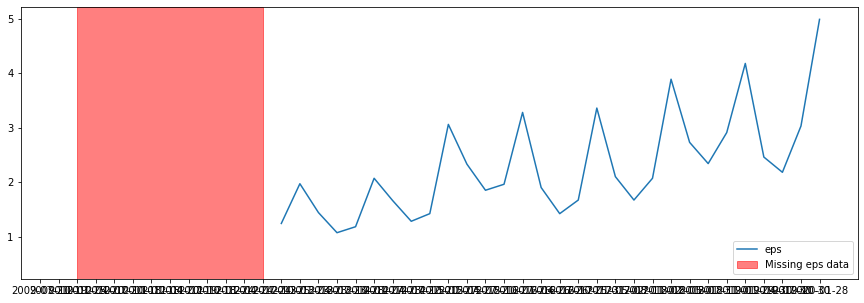

In [32]:
# 'eps' data for 'Apple' (symbol=AAPL)

null_eps=earning_df[earning_df.eps.isnull()]
aapl_null_eps=null_eps[null_eps.symbol=='AAPL']
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(earning_df.loc[earning_df['symbol'] == 'AAPL'].date,earning_df.loc[earning_df['symbol'] == 'AAPL'].eps, label='eps')
ax.axvspan(aapl_null_eps.date.iloc[1], aapl_null_eps.date.iloc[-1], alpha=0.5, color='red',label='Missing eps data')
plt.legend()
plt.show()

In [33]:
# 'earning' data without NaN eps values
earning_df=earning_df[earning_df.eps.notna()]
earning_df.head()

,symbol,date,qtr,eps_est,eps,release_time
14,A,2012-11-19,10/2012,0.80,0.84,post
15,A,2013-02-14,01/2013,0.66,0.63,post
16,A,2013-05-14,04/2013,0.67,0.77,post
17,A,2013-08-14,07/2013,0.62,0.68,post
18,A,2013-11-14,10/2013,0.76,0.81,post


In [34]:
# check for missing data in 'earning' again
nas=pd.DataFrame(100*(earning_df.isnull().sum().sort_values(ascending=False)/len(earning_df)),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
release_time,29.840750
eps_est,21.395222
qtr,0.852278


In [35]:
# eps would be the closest estimate for eps_est
# lets fill out the missing values of eps_Est by eps
earning_df.eps_est=earning_df.eps_est.fillna(earning_df.eps).values

In [36]:
# check for missing data in 'earning' again
nas=pd.DataFrame(100*(earning_df.isnull().sum().sort_values(ascending=False)/len(earning_df)),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
release_time,29.840750
qtr,0.852278


In [37]:
# 'release_time' in 'earning' data will be filled up by forward fill method ('fill'). The reasoning behind are fellow:
#----------------------------------------------------------------------------------------
# 1. removing ~30% data will be very costly
# 2. where release_time is NaN, qtr values are in (Q1, Q2, Q3 or Q4). So deciding about release_time is not possible
# 3. release_time column has the variables ratio, post: pre has 53:47 % split. so filling up Nan values by random split could be an option
# 4. exploring the release_time shows that post/pre data appeared in bunch mostly. so filling by forward fill method would be the best choice here

earning_df.release_time=earning_df.release_time.fillna(method='ffill').values

In [38]:
# check for missing data in 'earning' again
nas=pd.DataFrame(100*(earning_df.isnull().sum().sort_values(ascending=False)/len(earning_df)),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
qtr,0.852278


In [39]:
# qtr is the fiscal quarter, can be determined from the date
# plan is to categorize into Q1-Q4 depending on the month the eps was declared
earning_df.date=pd.to_datetime(earning_df.date).values
earning_df.qtr=np.ceil(pd.DatetimeIndex(earning_df.date).month/3)
# earning_df['qtr'] = 'Q' + earning_df['qtr'].astype(str)   # Q1, Q2, Q3, Q4 represented by 1, 2, 3 and 4
earning_df.head(5)

,symbol,date,qtr,eps_est,eps,release_time
14,A,2012-11-19,4.0,0.80,0.84,post
15,A,2013-02-14,1.0,0.66,0.63,post
16,A,2013-05-14,2.0,0.67,0.77,post
17,A,2013-08-14,3.0,0.62,0.68,post
18,A,2013-11-14,4.0,0.76,0.81,post


In [40]:
# check for missing data in 'earning' again
nas=pd.DataFrame(100*(earning_df.isnull().sum().sort_values(ascending=False)/len(earning_df)),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent


In [41]:
# at this point, missing values in 'earning_df' have been addressed

### remove missing values from 'summary_df' dataframe

In [42]:
# when the 'total_Earnings' is 0, NaN is assigned in those 'earnings_from_date' and 'earning_to_date' columns
# even though 'total_Earnings' is 0, 'total_prices' is not. so 'stock_from_date' will be assigned for 'earning_from_date' 
# and 'stock_to_date' will be assigned to 'earnings_to_date' column
summary_df['earnings_from_date'].fillna(summary_df['stock_from_date'], inplace=True)
summary_df['earnings_to_date'].fillna(summary_df['stock_to_date'], inplace=True)

In [43]:
# check for missing data in 'summary_df' again
nas=pd.DataFrame(100*(summary_df.isnull().sum().sort_values(ascending=False)/len(summary_df)),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent


This point resolves all missing value/NaA problem in the dataframes

## Look for duplicate rows

In [44]:
# dividend_df
duplicateRowsDF = dividend_df[dividend_df.duplicated()]
print('duplicte rows in dividend_df is:',format(len(duplicateRowsDF)))

# earning_df
duplicateRowsDF = earning_df[earning_df.duplicated()]
print('duplicte rows in earning_df is:',format(len(duplicateRowsDF)))

# stockprice_df
duplicateRowsDF = stockprice_df[stockprice_df.duplicated()]
print('duplicte rows in stockprice_df is:',format(len(duplicateRowsDF)))

# summary_df
duplicateRowsDF = summary_df[summary_df.duplicated()]
print('duplicte rows in summary_df is:',format(len(duplicateRowsDF)))

duplicte rows in dividend_df is: 0
duplicte rows in earning_df is: 0
duplicte rows in stockprice_df is: 0
duplicte rows in summary_df is: 0


No duplicate rows were found

# Extract only Apple data from the dataframes

In [45]:
# dividend_apple_df
dividend_apple_df=dividend_df[dividend_df.symbol=='AAPL']   # extract AAPL data only
dividend_apple_df['year'] = pd.DatetimeIndex(dividend_apple_df['date']).year  # add a column 'year' on apple's dataframe
dividend_apple_df=dividend_apple_df.drop(columns=['symbol','date'])  # removing 'symbol',date' columns
dividend_apple_df=dividend_apple_df.groupby(['year']).mean()  # take yearly dividend data for apple
dividend_apple_df.reset_index(inplace=True)   # reset index
dividend_apple_df.head(5)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,year,dividend
0,2012,2.6500
1,2013,2.9500
2,2014,1.8200
3,2015,0.5075
4,2016,0.5575


In [46]:
# earning_apple_df
earning_apple_df=earning_df[earning_df.symbol=='AAPL']   # extract AAPL data only
earning_apple_df['year'] = pd.DatetimeIndex(earning_apple_df['date']).year  # add a column 'year' on apple's dataframe
earning_apple_df=earning_apple_df.drop(['symbol','date'], axis=1)  # removing 'symbol','date' columns
earning_apple_df=earning_apple_df.groupby(['year','release_time','qtr']).mean() # take yearly,monthly dividend data for apple
earning_apple_df.reset_index(inplace=True)   # reset index
earning_apple_df.head(5)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,year,release_time,qtr,eps_est,eps
0,2009,post,4.0,0.45,0.45
1,2012,post,4.0,1.26,1.24
2,2013,post,1.0,1.92,1.97
3,2013,post,2.0,1.45,1.44
4,2013,post,3.0,1.04,1.07


In [47]:
# stockprice_apple_df
stockprice_apple_df=stockprice_df[stockprice_df.symbol=='AAPL']   # extract AAPL data only
stockprice_apple_df['year'] = pd.DatetimeIndex(stockprice_apple_df['date']).year  # add a column 'year' on apple's dataframe
stockprice_apple_df=stockprice_apple_df.groupby(['year','date']).mean() # take yearly,monthly dividend data for apple
stockprice_apple_df.reset_index(inplace=True)   # reset index
stockprice_apple_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,year,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,1998,1998-01-02,13.63,16.25,13.50,16.25,0.5103,6411700,1.0
1,1998,1998-01-05,16.50,16.56,15.19,15.88,0.4987,5820300,1.0
2,1998,1998-01-06,15.94,20.00,14.75,18.94,0.5948,16182800,1.0
3,1998,1998-01-07,18.81,19.00,17.31,17.50,0.5496,9300200,1.0
4,1998,1998-01-08,17.44,18.62,16.94,18.19,0.5713,6910900,1.0


In [48]:
# summary_apple_df
summary_apple_df=summary_df[summary_df.symbol=='AAPL']   # extract AAPL data only
summary_apple_df
# yearly summary apple data can be derived from above three tables. so this dataframe will not be used

,symbol,total_prices,stock_from_date,stock_to_date,total_earnings,earnings_from_date,earnings_to_date
12,AAPL,5608,1998-01-02,2020-04-16,43,2009-07-21,2020-01-28


### Merging `dividend`, `earning`, `stock` data for Apple stock

In [394]:
df=pd.merge(stockprice_apple_df,earning_apple_df, how='left', on='year')
df=pd.merge(df,dividend_apple_df,how='left',on='year')
df.fillna('no record',inplace=True)
df.head(100)

,year,date,open,high,low,close,close_adjusted,volume,split_coefficient,release_time,qtr,eps_est,eps,dividend
0,1998,1998-01-02,13.63,16.25,13.50,16.25,0.5103,6411700,1.0,no record,no record,no record,no record,no record
1,1998,1998-01-05,16.50,16.56,15.19,15.88,0.4987,5820300,1.0,no record,no record,no record,no record,no record
2,1998,1998-01-06,15.94,20.00,14.75,18.94,0.5948,16182800,1.0,no record,no record,no record,no record,no record
3,1998,1998-01-07,18.81,19.00,17.31,17.50,0.5496,9300200,1.0,no record,no record,no record,no record,no record
4,1998,1998-01-08,17.44,18.62,16.94,18.19,0.5713,6910900,1.0,no record,no record,no record,no record,no record
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1998,1998-05-20,29.62,29.87,28.75,29.56,0.9283,1698000,1.0,no record,no record,no record,no record,no record
96,1998,1998-05-21,29.56,29.69,28.62,28.87,0.9067,1169600,1.0,no record,no record,no record,no record,no record
97,1998,1998-05-22,28.75,28.75,27.31,27.87,0.8753,2380300,1.0,no record,no record,no record,no record,no record
98,1998,1998-05-26,28.06,28.25,26.62,26.69,0.8382,2783700,1.0,no record,no record,no record,no record,no record


## Save Apple dataframe as a new CSV file

In [396]:
df.to_csv('data/apple_stockdata_wrangled.csv')
